In [2]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to C:\Users\WIJDANE
[nltk_data]     TAFTAF\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\WIJDANE
[nltk_data]     TAFTAF\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

# charger dataset en fr 

In [2]:
import pandas as pd

# Charger le dataset en français
df = pd.read_csv("dataset_feedbacks_etudiants_fr.csv")

print(df.head())


   id                                    commentaire sentiment
0   1   Le contenu est intéressant et bien expliqué.   positif
1   2         Formation neutre, pas très engageante.    neutre
2   3  Le professeur ne répondait pas aux questions.   négatif
3   4   Le cours était très clair et bien structuré.   positif
4   5   Le cours était très clair et bien structuré.   positif


In [3]:
df.head()

,id,commentaire,sentiment
0,1,Le contenu est intéressant et bien expliqué.,positif
1,2,"Formation neutre, pas très engageante.",neutre
2,3,Le professeur ne répondait pas aux questions.,négatif
3,4,Le cours était très clair et bien structuré.,positif
4,5,Le cours était très clair et bien structuré.,positif


In [4]:
df.info

<bound method DataFrame.info of         id                                    commentaire sentiment
0        1   Le contenu est intéressant et bien expliqué.   positif
1        2         Formation neutre, pas très engageante.    neutre
2        3  Le professeur ne répondait pas aux questions.   négatif
3        4   Le cours était très clair et bien structuré.   positif
4        5   Le cours était très clair et bien structuré.   positif
...    ...                                            ...       ...
1995  1996           Trop de devoirs, difficile à suivre.   négatif
1996  1997  Le professeur ne répondait pas aux questions.   négatif
1997  1998              Le cours était correct sans plus.    neutre
1998  1999   Le cours était très clair et bien structuré.   positif
1999  2000                Mauvaise organisation générale.   négatif

[2000 rows x 3 columns]>

In [5]:
df.columns

Index(['id', 'commentaire', 'sentiment'], dtype='object')

In [6]:
df.describe

<bound method NDFrame.describe of         id                                    commentaire sentiment
0        1   Le contenu est intéressant et bien expliqué.   positif
1        2         Formation neutre, pas très engageante.    neutre
2        3  Le professeur ne répondait pas aux questions.   négatif
3        4   Le cours était très clair et bien structuré.   positif
4        5   Le cours était très clair et bien structuré.   positif
...    ...                                            ...       ...
1995  1996           Trop de devoirs, difficile à suivre.   négatif
1996  1997  Le professeur ne répondait pas aux questions.   négatif
1997  1998              Le cours était correct sans plus.    neutre
1998  1999   Le cours était très clair et bien structuré.   positif
1999  2000                Mauvaise organisation générale.   négatif

[2000 rows x 3 columns]>

# Nettoyage et prétraitement du texte avec NLTK

In [7]:
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Stopwords en français
stop_words = set(stopwords.words('french'))

# Fonction de nettoyage
def preprocess_text(text):
    # Minuscule
    text = text.lower()
    # Supprimer la ponctuation
    text = ''.join([c for c in text if c not in string.punctuation])
    # Tokenisation
    tokens = word_tokenize(text, language='french')
    # Retirer les stop words
    tokens = [word for word in tokens if word not in stop_words]
    return ' '.join(tokens)

# Appliquer
df['cleaned'] = df['commentaire'].apply(preprocess_text)


# Stopwords en français
stop_words = set(stopwords.words('french'))

# Fonction de nettoyage
def preprocess_text(text):
    # Minuscule
    text = text.lower()
    # Supprimer la ponctuation
    text = ''.join([c for c in text if c not in string.punctuation])
    # Tokenisation
    tokens = word_tokenize(text, language='french')
    # Retirer les stop words
    tokens = [word for word in tokens if word not in stop_words]
    return ' '.join(tokens)

# Appliquer
df['cleaned'] = df['commentaire'].apply(preprocess_text)


# definir  texte et étiquette

In [8]:
X = df['cleaned']
y = df['sentiment']

# Vectorisation TF-IDF + Modèle Naive Bayes

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

# Découpage train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words=list(stop_words))),
    ('clf', MultinomialNB())
])

# Entraînement
pipeline.fit(X_train, y_train)

# Prédiction
y_pred = pipeline.predict(X_test)

# Évaluation
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

      neutre       1.00      1.00      1.00       137
     négatif       1.00      1.00      1.00       133
     positif       1.00      1.00      1.00       130

    accuracy                           1.00       400
   macro avg       1.00      1.00      1.00       400
weighted avg       1.00      1.00      1.00       400



In [10]:
import joblib
joblib.dump(pipeline, "sentiment_model_fr_nb.pkl")

['sentiment_model_fr_nb.pkl']

In [11]:
model = joblib.load("sentiment_model_fr_nb.pkl")


test100 = ["Je trouve ce cours très utile et bien expliqué."]
prediction = model.predict(test100)
print(f"Sentiment prédit : {prediction[0]}")


Sentiment prédit : positif


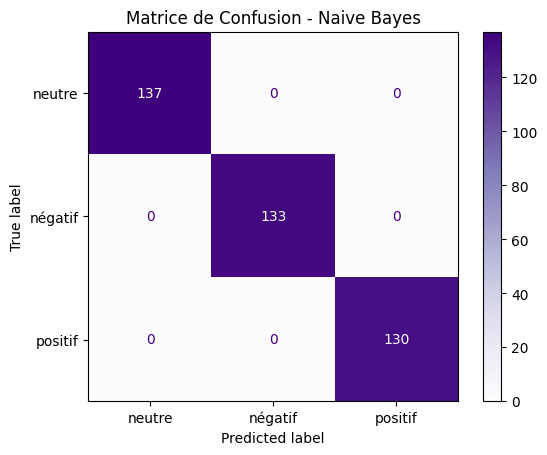

In [13]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Générer la matrice de confusion
cm = confusion_matrix(y_test, y_pred)

# Afficher la matrice
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=pipeline.classes_)
disp.plot(cmap=plt.cm.Purples)
plt.title("Matrice de Confusion - Naive Bayes")
plt.show()
